In [10]:
from titanfp import bench
bench.sweep_verbose = True

data = bench.sweep_core_1arg_multi(bench.cores['ex3.1'], range(-14,16), range(11, 12), 5, 64, bench.ctx128)

print(len(data))

points = {}
for x, y in data:
    if (x, y) in points:
        points[(x, y)] += 1
    else:
        points[(x, y)] = 1

xs = []
ys = []
colors = []
maxc = 0

for (x, y), count in points.items():
    xs.append(x)
    ys.append(y)
    #c = count.bit_length()
    c = count
    colors.append(c)
    if c > maxc:
        maxc = c
        
greyscale = [str(1 - (c / maxc)) for c in colors]


# cdf per x point

cdfs = {}
for (x, y), count in points.items():
    if x not in cdfs:
        cdfs[x] = {}
    cdfs[x][y-x] = count
    
cdf_xys = {}
for cdf_x, cdf in cdfs.items():
    sum = 0
    cdf_xs = []
    cdf_ys = []
    for x in sorted(cdf):
        sum += cdf[x]
        cdf_xs.append(x)
        cdf_ys.append(sum)
    cdf_ys = [y / sum for y in cdf_ys]
    cdf_xys[cdf_x] = [cdf_xs, cdf_ys] 
    

print(len(greyscale))

FPCore (x)
  name: NMSE example 3.1
   pre: (>= x 0)
  spec: None
  (- (sqrt (+ x 1)) (sqrt x))
running with 64 total bits, 8 processes

150
69


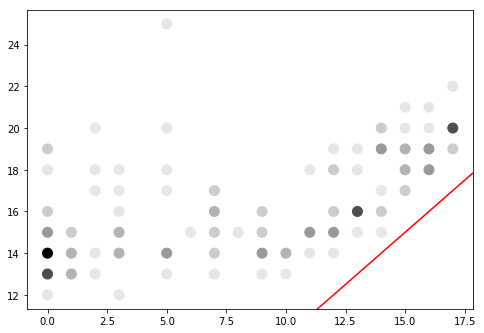

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()

fig.set_size_inches(8, 5.5)

ax.scatter(xs, ys, s=100, color=greyscale)
#plt.ylim((0, 16))
#plt.xlim((0, 16))

xlim = ax.get_xlim()
line = mlines.Line2D(xlim, xlim, color='red')
#transform=ax.transAxes
#line.set_transform(transform)
ax.add_line(line)

plt.show()


# Write this as a cdf:

# one line for each number of ground truth bits bits
# plot % of reported bits

# x axis is y axis - x axis
# y axis is % points that are less than x axis
# separate line for each x axis position


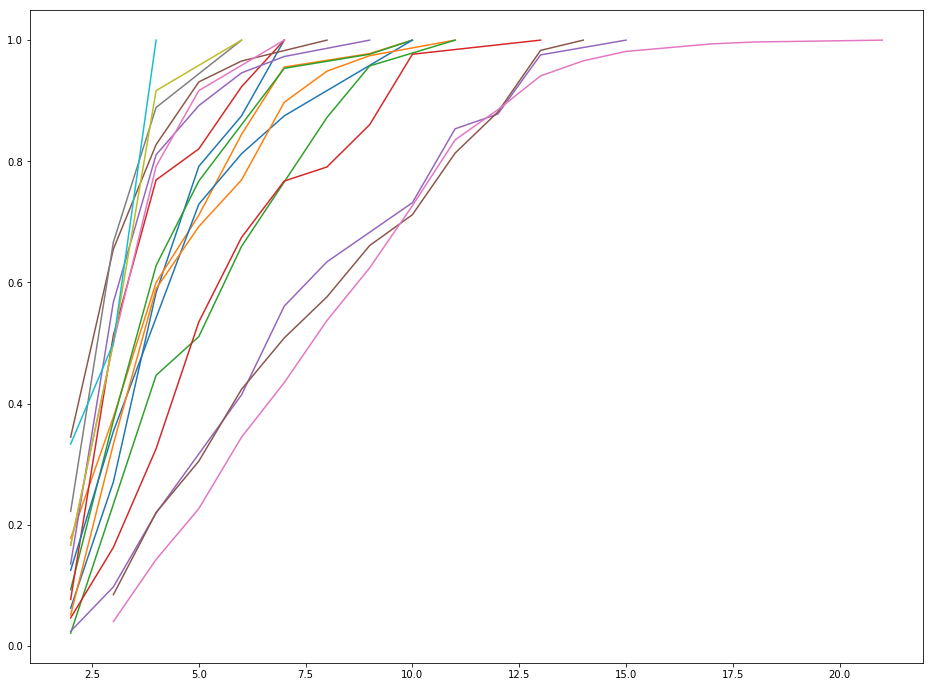

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.set_size_inches(16, 12)

for x, (xs, ys) in cdf_xys.items():
    plt.plot(xs, ys)

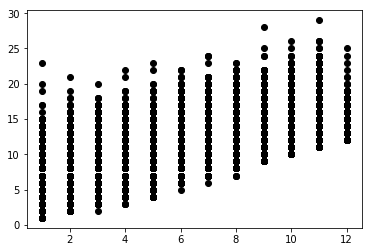

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', color='black')